# Fizz Buzz Benchmark Example
The explanation how to calc benchmark. (created by @sadahiroyoshi)

## Preparation
Import libs & load config files.

In [1]:
import platform
import pandas as pd
import tool.language as language
import tool.benchmark as benchmark

In [2]:
# load all languages in conf/languages.csv.
langs = language.load_languages()

## Print Your Device Info
Check your environment before execute.

In [3]:
# print OS info of your device.
print( "platform.system()={}".format( platform.system() ))
print( "platform.version()={}".format( platform.version() ))
print( "platform.release()={}".format( platform.release() ))

platform.system()=Darwin
platform.version()=Darwin Kernel Version 20.6.0: Mon Aug 30 06:12:20 PDT 2021; root:xnu-7195.141.6~3/RELEASE_ARM64_T8101
platform.release()=20.6.0


In [4]:
# print all versions of each langs on your device.
for _lang in langs:
    language.print_version(_lang)

python:
Python 3.9.6

rust:
rustc 1.54.0 (a178d0322 2021-07-26)

go:
go version go1.17.2 darwin/amd64

scala:
Scala code runner version 2.13.6 -- Copyright 2002-2021, LAMP/EPFL and Lightbend, Inc.

c:
Apple clang version 13.0.0 (clang-1300.0.29.3)
Target: x86_64-apple-darwin20.6.0
Thread model: posix
InstalledDir: /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin

java:
openjdk 16.0.2 2021-07-20
OpenJDK Runtime Environment (build 16.0.2+7-67)
OpenJDK 64-Bit Server VM (build 16.0.2+7-67, mixed mode, sharing)

ruby:
ruby 2.6.5p114 (2019-10-01 revision 67812) [x86_64-darwin19]

dart:
Dart SDK version: 2.14.3 (stable) (Wed Sep 29 13:10:26 2021 +0200) on "macos_x64"

nodejs:
v8.10.0



## Run Method

Run the method which is wanted to calculate a benchmark.

In [5]:
# calculate all benchmarks of 'println'
method = 'println'
n = 100_000
r = 10

results_by_langs = {}
_debug = True
for _lang in langs:
    # if `debug=True`, you can check actual cmd line in `benchmark.run`
    results_by_langs[_lang] = benchmark.run(method, _lang, n, r, debug=_debug)
    _debug = False # `debug=True` only at first exec

04:38:28.882 tool.benchmark:66 run [DEBUG]: python started...
04:38:28.884 tool.benchmark:76 run [DEBUG]: run 10 times: python /Users/sadahiroyoshi/repo/fizz-buzz-benchmarks/script/python/println/fizz_buzz_println.py 100000
04:38:29.727 tool.benchmark:81 run [DEBUG]: ignore the first run as noise removing
04:38:29.732 tool.benchmark:84 run [DEBUG]: python finished...


`benchmark.run` is internally running method of each langs via CLI. The overhead time when staring CLI, may much effects execution time of this method. So after `benchmark.run`, also run the method 'nothing'. this method is 'do nothing' or empty script file of each langs.

You will get real execution time by substracting the 'nothing' time. 

In [6]:
# also run scripts 'nothing' (to measure execution time of lang cmd itself)
results_by_langs_nothing = {}
for _lang in langs:
    results_by_langs_nothing[_lang] = benchmark.run('nothing', _lang, n, r)

In [7]:
# calculate avg of the method & 'nothing'.
_avgs = [
    sum(results_by_langs[_lang]) / r for _lang in langs
]
_avgs_nothing = [
    sum(results_by_langs_nothing[_lang]) / r for _lang in langs
]

df = pd.DataFrame({
    method: _avgs,
    'nothing': _avgs_nothing,
}, index=langs)
df.index.name = 'language'

In [8]:
# substracting the 'nothing' time.
df['real'] = df[method] - df['nothing']

## Data Plot
Finally, plot these results.

<AxesSubplot:ylabel='language'>

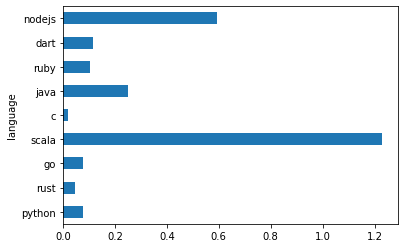

In [9]:
df[method].plot.barh()

The result seems that `scala` is most slowest in `println`.

But it is not true because `scala` CLI has much overhead time than other languages.
Let us check the execution time of 'nothing'.

<AxesSubplot:ylabel='language'>

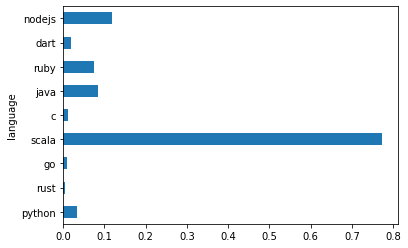

In [10]:
df['nothing'].plot.barh()

As you can see, `scala` overhead time is much longer.

Finally, check the 'real' time by substracting `println` by the 'nothing' time.

<AxesSubplot:ylabel='language'>

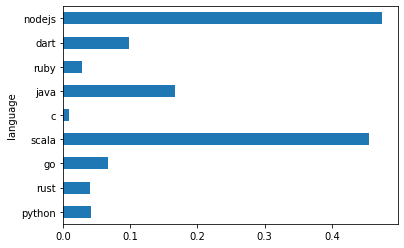

In [11]:
df['real'].plot.barh()

As a result, `nodejs` is most slowest in `println`!!

But `scala` seems to be slower than others...

Let's check other method & try to fix params!!

I recommend you to copy this notebook as you can check current result.